# USA House Price Prediction
![](us1.jpg)

### Contents 
1. Abstract
2. Importing the dataset
3. Importing required libraries
4. Data Loading and Overview
5. Exploratory Data Analysis
    - Distribution of data plotting using distplot
    - Feature distribution using Boxplot
    - Data Pre-processing
6. Regression Model creation
    - Linear regression
    - Random Forest regression
    - Lasso regression+
    - Ridge regression
    - Gradient Boosting regression
    - XGBoosting regression
    - MLP regression
    - Support vector regressor
7. Accuracy wise distribution
8. Conclusion

### 1   Abstract
With Covid encouraging city dwellers to move to the suburbs and families looking for home offices and bigger yards, prices for the American dream home have skyrocketed. Home prices surged in March, up 13.2% from the year prior, according to the S&P CoreLogic Case-Shiller National Home Price Index. “Everybody expected housing to really sort of dry up with the rest of the economy,” said National Association of Home Builders CEO Jerry Howard. “And in fact, the opposite has happened. People who have been sort of scared out of the cities by the pandemic.”

In this crisis, a prediction model is required for generating the prices for the houses.

### 2   Dataset
The dataset is used here, collected from Kaggle website. Here is the link for the dataset : https://www.kaggle.com/dmvreddy91/usahousing



### 3   Importing Libraries and dataset 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

### 4   Data loading and overview

In [4]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## 5   EDA : Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's visualize the dataset...

### 5.A   Visualization using Distplot on the various attributes
distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

We look at the distribution

**Average Area Income**

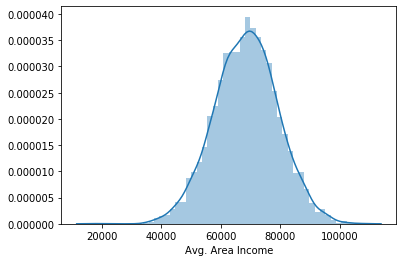

In [6]:
sns.distplot(df['Avg. Area Income'])

**Average Area House Age**

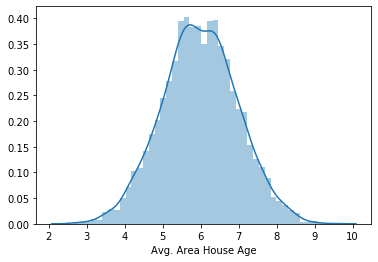

In [7]:
sns.distplot(df['Avg. Area House Age'])

**Average Area Number of rooms**

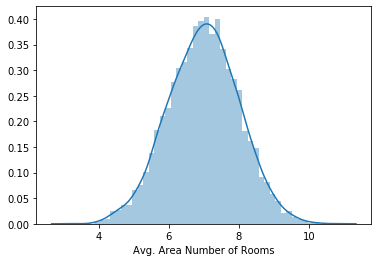

In [8]:
sns.distplot(df['Avg. Area Number of Rooms'])

**Average Area Number of bedrooms**

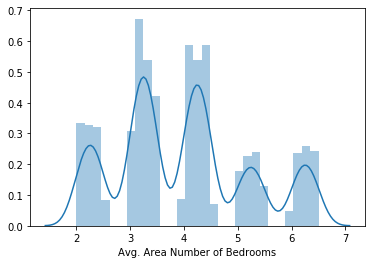

In [9]:
sns.distplot(df['Avg. Area Number of Bedrooms'])

**Area Population**

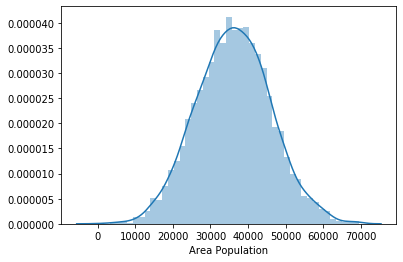

In [10]:
sns.distplot(df['Area Population'])

**Price**

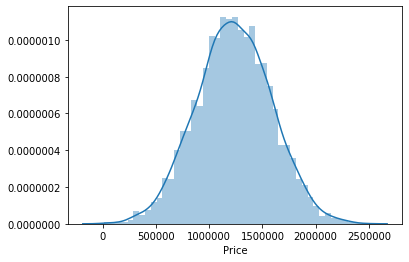

In [11]:
sns.distplot(df['Price'])

Feature distribution is normal

### 5.B   Visualization using Boxplot
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

**Average Area Income**

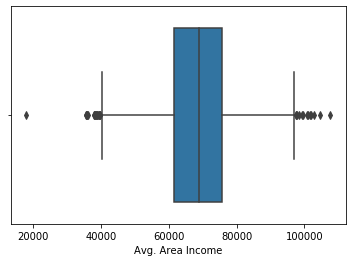

In [12]:
sns.boxplot(x='Avg. Area Income', data = df)

**Average Area House Age**

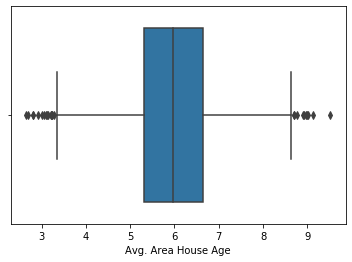

In [13]:
sns.boxplot(x='Avg. Area House Age', data = df)

**Average Area Number of rooms**

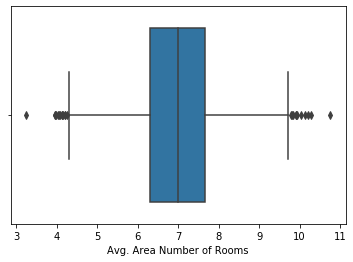

In [14]:
sns.boxplot(x='Avg. Area Number of Rooms', data = df)

**Average Area Number of bedrooms**

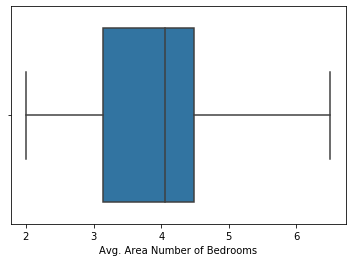

In [15]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data = df)

**Area Population**

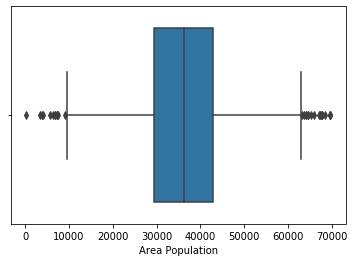

In [16]:
sns.boxplot(x='Area Population', data = df)

**Price**

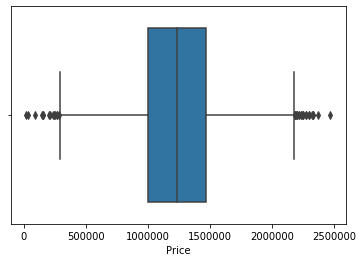

In [17]:
sns.boxplot(x='Price', data = df)

We have outliers

### 5.C   Data Preprocessing
Data preprocessing is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, and missing values, etc. 

In [18]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [19]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [20]:
df = df.drop('Address', axis = 1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


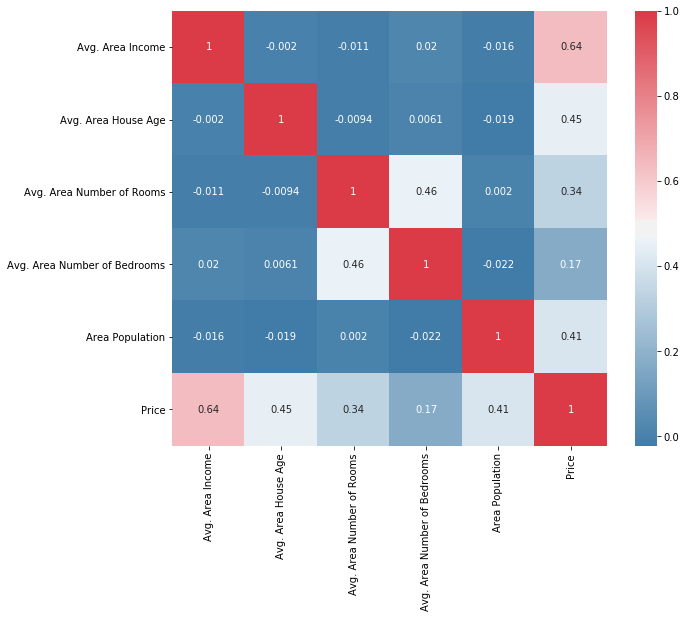

In [21]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)

In [22]:
df.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [23]:
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [24]:
df_std.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


## 6   Regression Model Creation
Regression analysis consists of a set of machine learning methods that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.

Here we are going to prepare several Regression machine learning models based on those we will do a comparative analysis that which model is better among them.

I have decided to go with seven linear regression models to evaluate this dataset - 

* **Linear Regression** : Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


* **Random Forest Regression** : Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.


* **Decision Tree Regression** : Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.


* **Lasso Regression** : In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.


* **Ridge Regression** : Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.


* **XgBoost Regressor** : XGBoost is a powerful approach for building supervised regression models. ... Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods.


* **MLP Regressor** : A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

Let's deploy the models...

In [25]:
X = df.drop('Price', axis = 1)
y = df.Price

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [27]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.150e+04
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:31:42   Log-Likelihood:                         -55265.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3995   BIC:                                  1.106e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

**The function removes features with high p-value**

In [28]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break


Dropping Avg. Area Number of Bedrooms and running regression again because pvalue is: 0.12293348245949395
All p values less than 0.05


**Summary report for the model fitting and creation**

In [29]:
print(regressor.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.687e+04
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                        0.00
Time:                        13:31:48   Log-Likelihood:                         -55266.
No. Observations:                4000   AIC:                                  1.105e+05
Df Residuals:                    3996   BIC:                                  1.106e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### SelectKBest
SelectKBest then simply retains the first k features of X with the highest scores. So, for example, if you pass chi2 as a score function, SelectKBest will compute the chi2 statistic between each feature of X and y (assumed to be class labels). A small value will mean the feature is independent of y.

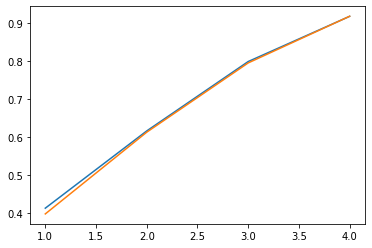

In [30]:
column_names = df.drop(columns = ['Price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

#Look at shape
for k in range(1, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [31]:
# k = 4 because look at orange line
selector = SelectKBest(f_regression, k = 4)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [32]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

###  7.     Model performance evaluation using the Accuracy Scores

In [33]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor(), XGBRegressor(), GradientBoostingRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": round(score, 2)}, ignore_index=True)

model_performance.sort_values(by = 'Score', ascending = False)

[13:32:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Features,Model,Score
0,Linear,LinearRegression(),0.92
1,Linear,Ridge(),0.92
2,Linear,Lasso(),0.92
6,Linear,XGBRegressor(),0.90
7,Linear,([DecisionTreeRegressor(criterion='friedman_ms...,0.90
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.89
5,Linear,MLPRegressor(),0.49
3,Linear,SVR(),-0.00


**Deploying the polynomial features as well**

(4000, 21)


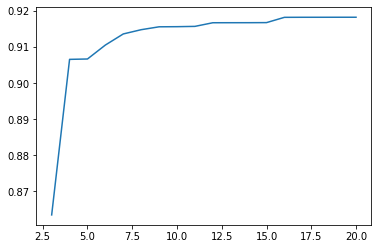

In [34]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(3, 21):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

In [35]:
selector = SelectKBest(f_regression, k = 16)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

### Comparing the Linear and Polynomial Features 


We have deployed fifteen machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

In [36]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor(), XGBRegressor(), GradientBoostingRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": round(score, 2)}, ignore_index=True)

model_performance.sort_values(by = 'Score', ascending = False)


[13:32:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Features,Model,Score
0,Linear,LinearRegression(),0.92
1,Linear,Ridge(),0.92
2,Linear,Lasso(),0.92
8,Polynomial,LinearRegression(),0.92
9,Polynomial,Ridge(),0.92
10,Polynomial,Lasso(),0.92
14,Polynomial,XGBRegressor(),0.91
15,Polynomial,([DecisionTreeRegressor(criterion='friedman_ms...,0.91
6,Linear,XGBRegressor(),0.90
7,Linear,([DecisionTreeRegressor(criterion='friedman_ms...,0.90


*******************

### 8.  Conclusion

**Comparing all those scores scored by the machine learning algorithms, it is clear that Linear Regression is having the upper hand in case of this dataset and after this, we can use Lasso Regression, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Polynomial Linear Regression
5. Polynomial Ridge Regression
6. Polynomial Lasso Regression
7. Polynomial XgBoosting Regression
8. Polynomial Decision Tree Regressor
9. linear XgBoosting regressor
10. linear MLP regressor
11. Linear SVR
12. Polynomial SVR
13. Polynomial MLP regressor

Hooray!! The models are deployed successfully!

## Hope this project will help you! Thank you!